In [1]:
import matplotlib.pyplot as plt
from _code.markov_chain import MarkovChain
from _code.markov_dict import MarkovDict
from _code.syntax_chain import SyntaxChain
import cPickle as pickle
%matplotlib inline
import pandas as pd
import numpy as np

### Open up Neighbors File

In [2]:
with open('data/neighbours.pkl') as f:
    neighbor_dict = pickle.load(f)

### Fit Dictionary
fname is a text file of the corpus  
chain_len is the n_gram size for the MarkovDict  
gtype in [naive, pos, syntax, syntax_pos]  
pos means Part of Speech  

In [11]:
print 'Fitting Dictionary'
fname = 'data/obama_corpus.txt'
gram_size = 2
md = MarkovDict(fname, gram_size, gtype='syntax_pos')

Fitting Dictionary
Fitting Syntax Model
Loading from file
Syntax Model Complete


### Fit Markov Chain
MarkovChain self generates priority and not_found_list or you can pass them in  
priority are words in user input to use as the seed  
not_found_list is the sentences to display if no neighbor can be found
the two gram_size paramenters provide additional tuning


In [4]:
priority_list = ['america', 'iran', 'iraq', 'health', 'terrorism']
not_found_list = [
    'Change will not come if we wait for some other person or some other time. We are the ones we\'ve been waiting for. We are the change that we seek.',
    'If you\'re walking down the right path and you\'re willing to keep walking, eventually you\'ll make progress.',
    'The future rewards those who press on. I don\'t have time to feel sorry for myself. I don\'t have time to complain. I\'m going to press on.',
    'I don\'t oppose all wars. What I am opposed to is a dumb war. What I am opposed to is a rash war.',
    'There\'s not a liberal America and a conservative America - there\'s the United States of America.']

mc = MarkovChain(md.api, neighbor_dict=neighbor_dict)
print mc.run('america', key_gram_size=1, value_gram_size=1)


I also understand that some people will need them all for the consequences of climate change that helps natural gas that can last America from selling her products all over the last three years, this simple recognition won't rest until the police officer she married walks through the G-20 to restore the basic bargain that built this country they should be decided by the opportunities that this generation's success, we have in the world.


Run with whatever seed you want!

In [5]:
mc.run('congress', 2, 1)

"Take the money you've got to keep trying, with or without Congress sends me a law to provide and protect health insurance 65% cheaper for families who get their degree, and make sure he can do a lot of Americans outside Washington who are willing to work than Europe, Japan, and lowers tax rates for the rest of the American values of fair play and shared responsibility will help entrepreneurs and new chance to save for retirement."

### Syntax Only Sentence Generation
We can also generate sentences using only Syntax  
This has similar options to MarkovDict above  
SyntaxChain selects from real syntaxes in corpus, min_appearnces is the minimum times a structure needs to appear to be selected

In [6]:
sc = SyntaxChain(fname, gtype='syntax_pos')

Loading from file


In [7]:
sc.run(min_appearances=2)

'Hawaii are the 18 bills auto wealth upward immigrants and.'

### Generate Wordcloud

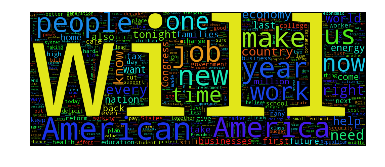

In [9]:
args = dict(max_words=2000,
           background_color='black',
           height=400,
           width=1000)
md.wordcloud(**args)

### Generate Histogram of markov chain uniqueness

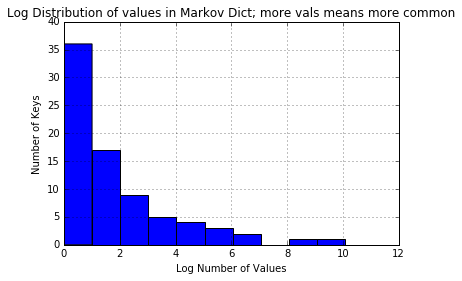

In [10]:
dist_of_val_len_df = pd.DataFrame.from_dict(md.stats['dist_of_val_len'], orient='index')
dist_of_val_len_df.apply(lambda x: np.log(x)).hist()
plt.title('Log Distribution of values in Markov Dict; more vals means more common')
plt.xlabel('Log Number of Values')
plt.ylabel('Number of Keys')
plt.show()